<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
from tqdm import tqdm
from ballroom_analysis.scoring import *
from ballroom_analysis.scraping import *

Amateur Collegiate Gold Standard
Amateur Collegiate Silver Rhythm
Amateur Collegiate Gold Rhythm
Amateur Adult Silver Rhythm
Amateur Collegiate Silver Standard
Amateur Collegiate Silver Intl. Tango
Amateur Collegiate All Syllabus Standard
Amateur Adult Silver Intl. V. Waltz
Amateur Adult Silver Standard
Amateur Adult Silver Intl. Tango
Amateur Collegiate Silver Smooth
Amateur Adult Gold Smooth
Amateur Collegiate Gold Smooth
Amateur Adult Novice Smooth
Amateur Adult Silver Latin
Amateur Collegiate Silver Latin
Amateur Collegiate Bronze Latin
Amateur Adult Bronze 1 Latin
Amateur Adult Bronze Latin
detected single-event
calculating event-wise score


In [55]:
name = "Alyssa Razmus"
soup = get_event_list_html(name)
events = extract_events_from_html(soup)

In [56]:
results = [get_event_result(name, event_url) for _, event_url in events]

In [57]:
for (event_name, event_url), result in zip(events, results):
    if result.placement:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks and placed {result.placement} ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")
    else:
        print(f"In {event_name}, {name.split()[0]} got {result.callbacks} callbacks ({result.num_dances} dances)")
        print(f"\tscored {score_result(result)}")

In Amateur Adult Silver Intl. V. Waltz, Alyssa got 2 callbacks and placed 1.0 (1 dances)
	scored 39.0
In Amateur Adult Silver Standard, Alyssa got 2 callbacks and placed 1.0 (3 dances)
	scored 117.0
In Amateur Adult Silver Intl. Tango, Alyssa got 2 callbacks and placed 1.0 (1 dances)
	scored 39.0


In [58]:
sum(score_result(result) for result in results)

195.0

In [ ]:
file_path = "../data/roster.txt"

with open(file_path, "r") as file:
    names = file.readlines()

names = [name.strip() for name in names]

In [ ]:
events_by_name, results_by_name, score_by_name = {}, {}, {}

for name in tqdm(names):
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name][1])

In [39]:
sorted_scores = sorted(score_by_name.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores:
    print(f"{name}: {score}")

Echo Nelson: 919.0
Carmen Schultz: 820.5
Khalid Ali: 809.5
Armarion Julien: 708.0
Aquarina Hoanca: 602.0
Irena Wilson: 600.0
Jack Orr: 552.0
Tessa Lundheim: 522.0
Daniel Kindem: 427.0
Kourtney Muus: 355.0
Cas Wehring: 325.0
Brody Schaffner: 292.0
Keding Chen: 276.0
Alena Ang: 270.0
Mei Abraham: 262.0
Allison Jondahl: 201.0
Maddie Shaheen: 183.0
Sasha Hydrie: 169.0
Connor de Bruin: 168
Joseph Jackson: 157.0
Emma Nahr: 151.0
Alexis Villapando: 150
Hailey Bargman: 148.0
Daniel Han: 136.0
Olesia Sarazhynskyy: 123.0
Pheng Xiong: 120.0
Elizabeth Wahl: 96.0
Sydney Goethel: 90
Henry Jonas: 69
Maya Lindvall: 69
Helen Hoang: 66
Ryan Lynch: 54
Rachel Luban: 48
Vaibhav Jain: 45
Yadu Kiran: 42
Jeffrey Zhao: 36
Lev Ostrer: 30


In [40]:
sum([score for (_, score) in score_by_name.items()])

10091.0

CR shy: this could be significantly sped up by caching events (especially since the vast majority of our dancers are in the same few events). Probably use autocaching in the gets.

In [38]:
extra_names = ["Alexander Vladimirov"]

for name in extra_names:
    events_by_name[name] = extract_events_from_html(get_event_list_html(name))
    results_by_name[name] = [get_event_result(name, event_url) for _, event_url in events_by_name[name]]
    score_by_name[name] = sum(score_result(result) for result in results_by_name[name])
    print(f"{name}: {score_by_name[name]}")

In [46]:
delete_names = ['Broderick Schaffner', 'Jeff Zhao']
for name in delete_names:
    del score_by_name[name]
    del results_by_name[name]
    del events_by_name[name]
    names.remove(name)

In [49]:
dancer_info = {name: (events_by_name[name], results_by_name[name]) for name in names}

In [50]:
import pickle
with open("../data/dancer_info.pkl", "wb") as file:
    pickle.dump(dancer_info, file)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
sns.set_style("darkgrid")

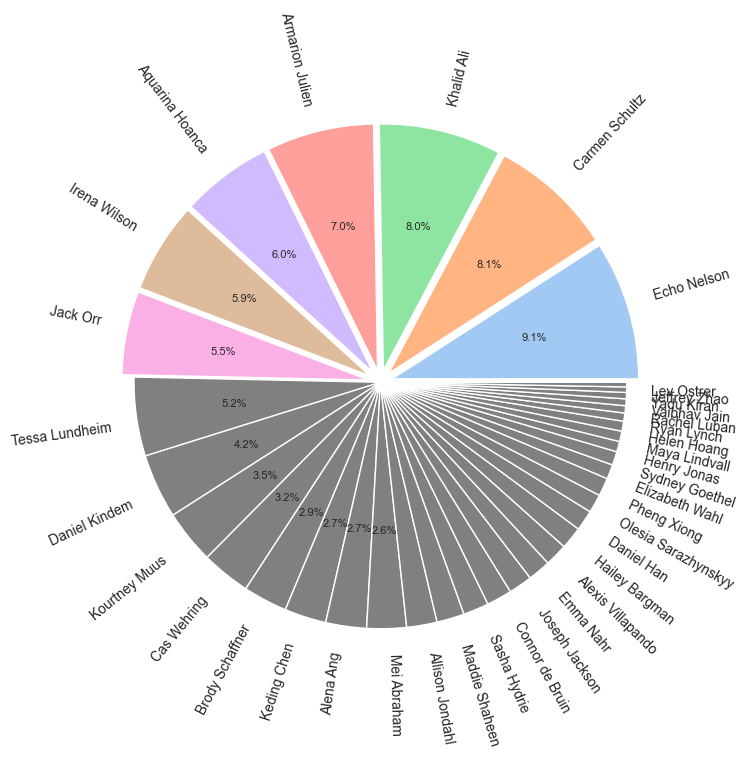

In [97]:
scores = {name: sum(score_result(result) for result in results) for name, (_, results) in dancer_info.items()}
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
labels = [name for name, _ in sorted_scores]
values = [score for _, score in sorted_scores]

explosion = [0] * len(labels)
explosion[:7] = [0.05] * 7 # type: ignore

colors = sns.color_palette("pastel")[:7]
colors.extend(['grey'] * (len(labels) - 7))  # type: ignore

def autopct(pct):
    return ('%1.1f%%' % pct) if pct >= 2 else ''

plt.figure(figsize=(8, 8))

_, _, autotexts = plt.pie(values, explode=explosion, labels=labels, colors=colors, autopct=autopct, rotatelabels=True) # type: ignore

for autotext in autotexts:
    autotext.set_fontsize(8)  

plt.show()